In [1]:
# Kornpob Bhirombhakdi
# kbhirombhakdi@stsci.edu

In [2]:
# don't forget to pip install axehelper
from axehelper.axehelper_confreader import AXEhelper_ConfReader
from axehelper.axehelper_computesip import AXEhelper_computeSIP
from axehelper.axehelper_computetracenwavelength import AXEhelper_computeTraceNWavelength

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt


In [3]:
conffile = '/Users/kbhirombhakdi/_work/_calib_files/ACS.WFC/ACS.WFC.CHIP1.Cycle13.5.conf'
flatfile = '/Users/kbhirombhakdi/_work/_calib_files/ACS.WFC/WFC.flat.cube.CH1.2.fits'

# assume source location (with other calibration) leading xref,yref
xref = np.array([400.])
yref = np.array([500.])


In [4]:
# get nax1,nax2
tmp = fits.open(flatfile)
nax1,nax2 = tmp[0].header['NAXIS1'],tmp[0].header['NAXIS2']
nax1,nax2


(4096, 2048)

# SIP

In [5]:
conf = AXEhelper_ConfReader(conffile)
conf.getbeam()
conf.make_coef2d()
obj = AXEhelper_computeSIP(conf.coef2d,xref,yref)
obj.compress()
obj.coef1d


{'DYDX_A_0': array([0.]),
 'DYDX_A_1': array([-0.036339]),
 'DLDP_A_0': array([4760.68276]),
 'DLDP_A_1': array([37.79908]),
 'DLDP_A_2': array([0.00317611])}

# Trace

In [7]:
newobj = AXEhelper_computeTraceNWavelength(obj.coef1d,obj.x1,obj.x2,
                                           nax1,nax2
                                          )
newobj.compute()


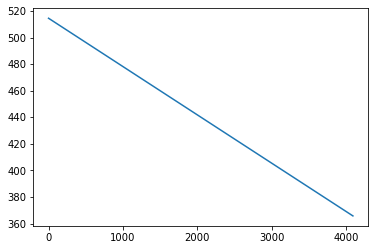

In [8]:
tmp = newobj.trace
plt.plot(tmp['XG'],tmp['YG'])

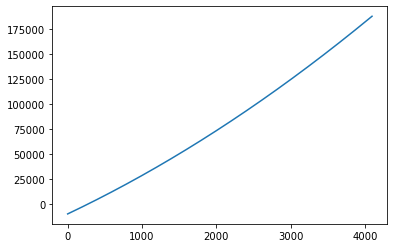

In [9]:
tmp = newobj.wavelength
plt.plot(tmp['XG'],tmp['WW'])